In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

%config InlineBackend.figure_format = 'retina'

from warnings import filterwarnings
filterwarnings('ignore')

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import sys
sys.path.append('/Users/patchong/Google Drive/Work/Prep/Challenges/Candid')

In [3]:
train = pd.read_csv('training_data.csv')

In [4]:
print('Shape: {0}'.format(train.shape))

Shape: (29094, 44)


In [5]:
train.head()

,customer_id,passed_funnel,city,shipping_state,shipping_zipcode,first_activity_at,attribution_channel,vendor,leadscore,q_age,q_apply,q_braces,q_budget,q_changes,q_clear_aligners,q_conditions,q_conditions1,q_conditions2,q_conditions3,q_dental_concerns,q_describe_teeth,q_finance_options,q_fsa_hsa,q_fsa_hsa_monthly,q_goals,q_happy,q_how_hear,q_hesitations,q_how_urgent,q_invisible_aligners,q_last_ortho,q_long,q_monthly,q_options_considering,q_ortho_checkup,q_referral,q_severity,q_teeth_spacing,q_urgency,q_whitening,q_why_interested,q_years_considering,q_zip,survey_started_at
0,339270,True,Brooklyn park,MN,55443,52:57.2,organic social,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,264573,True,Altus,OK,73521,48:07.2,paid search,google search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,317306,False,NaN,NaN,NaN,56:07.9,youtube,youtube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,324583,False,Bronx,NY,10457,41:56.5,paid social,facebook/instagram,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,303431,False,NaN,NaN,NaN,38:14.4,organic search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleansing & Feature Engineering

In [6]:
train.isna().sum()

customer_id                  0
passed_funnel                0
city                     11423
shipping_state           11427
shipping_zipcode         11423
first_activity_at            0
attribution_channel          4
vendor                    7690
leadscore                21376
q_age                    29093
q_apply                  29072
q_braces                 29054
q_budget                 29076
q_changes                29076
q_clear_aligners         29082
q_conditions             29093
q_conditions1            29093
q_conditions2            29093
q_conditions3            29093
q_dental_concerns        29089
q_describe_teeth         29054
q_finance_options        29094
q_fsa_hsa                29077
q_fsa_hsa_monthly        29094
q_goals                  29075
q_happy                  29076
q_how_hear               29073
q_hesitations            29094
q_how_urgent             29073
q_invisible_aligners     29066
q_last_ortho             29075
q_long                   29076
q_monthl

In [7]:
for col in train:
    print(col)
    print(train[col].value_counts())
    print('\n')

customer_id
329727    1
275980    1
318929    1
327125    1
191959    1
         ..
313996    1
318094    1
316047    1
338576    1
327680    1
Name: customer_id, Length: 29094, dtype: int64


passed_funnel
False    14763
True     14331
Name: passed_funnel, dtype: int64


city
New York          590
Brooklyn          507
Chicago           430
Los Angeles       426
San Francisco     292
                 ... 
Algonac             1
Pecos               1
Brandywine          1
Fortworth           1
Santa Barbara       1
Name: city, Length: 4259, dtype: int64


shipping_state
CA                     3779
NY                     2295
TX                     1788
IL                      849
FL                      846
MA                      815
GA                      752
MD                      630
NJ                      588
VA                      534
PA                      516
WA                      472
OH                      306
CO                      262
AZ                      252
MI  

In [10]:
train.isna().sum()

customer_id                  0
passed_funnel                0
city                     11423
shipping_state           11427
shipping_zipcode         11423
first_activity_at            0
attribution_channel          4
vendor                    7690
leadscore                21376
q_age                    29093
q_apply                  29072
q_braces                 29054
q_budget                 29076
q_changes                29076
q_clear_aligners         29082
q_conditions             29093
q_conditions1            29093
q_conditions2            29093
q_conditions3            29093
q_dental_concerns        29089
q_describe_teeth         29054
q_finance_options        29094
q_fsa_hsa                29077
q_fsa_hsa_monthly        29094
q_goals                  29075
q_happy                  29076
q_how_hear               29073
q_hesitations            29094
q_how_urgent             29073
q_invisible_aligners     29066
q_last_ortho             29075
q_long                   29076
q_monthl

Although many of the features seem like a good signal for predicting whether a user will progress in the funnel, too many of them have a large proportion of NaN's and won't be influential features. So, they won't be included in the feature set.

The remaining features we will consider are:

 * _first_activity_at_
 * _leadscore_
 * _attribution_channel_
 * _vendor_
 * _city_
 * _shipping_state_
 * _shipping_zipcode_

_first_activity_at_ won't be helpful for predicting future data.

It's challenging to know what _leadscore_ means. However, we will include it in the feature set and use the mode to fill NaN's. We'll assume the feature is discrete.

In [11]:
# train.leadscore = train.leadscore.fillna(train.leadscore.mode())
train.leadscore = train.leadscore.fillna(1.0)

Note, there are many ways to deal with data imputation.

* Remove the rows with missing data. However, we risk losing data points with valuable information.
* More sophisticated approaches involving defining a model to predict each missing feature as a function of all other features.
* Statistical value imputation (e.g. mode imputation) which is easy to calculate and often results in good performance.

_attribution_channel_ is likely to provide a good signal.  Similar to _leadscore_, we will use mode imputation.

_vendor_ looks similar to _attribution_channel_. It's best not to include the feature because there is a likelihood the two features are highly correlated.  _attribution_channel_ also has fewer NaN's.

In [12]:
train.attribution_channel = train.attribution_channel.fillna(train.attribution_channel.mode())

In [13]:
train.attribution_channel.value_counts()

paid social        13556
paid search         5203
direct              4177
organic search      2894
affiliate           1235
organic social       649
referral             512
podcast              266
email                233
influencer           102
youtube               81
social                78
radio                 29
display               23
direct mail           19
field                  9
streaming audio        8
unknown                7
sms                    4
ampush                 2
part                   2
ott                    1
Name: attribution_channel, dtype: int64

It appears that we may be able to group some channels.

In [14]:
train.attribution_channel = train.attribution_channel.replace({'youtube': 'paid social',
                                                               'direct': 'paid social',
                                                               'social': 'paid social',
                                                               'streaming audio' : 'podcast',
                                                               'direct mail' : 'email',
                                                               'display': 'other',
                                                               'field': 'other',
                                                               'unknown': 'other',
                                                               'sms': 'other',
                                                               'ampush': 'other',
                                                               'part': 'other',
                                                               'ott': 'other'})

In [15]:
train.attribution_channel.value_counts()

paid social       17892
paid search        5203
organic search     2894
affiliate          1235
organic social      649
referral            512
podcast             274
email               252
influencer          102
other                48
radio                29
Name: attribution_channel, dtype: int64

Since _attribution_channel_ is nominal, we'll one-hot encode the feature.

In [16]:
train = pd.concat([train, pd.get_dummies(train.attribution_channel, drop_first = True)], axis = 1)

It's likely that _city_, _shipping_state_, _shipping_zipcode_ are correlated and would only overfit our model, so we'll choose one.

In [17]:
train.shipping_state.describe()

count     17667
unique       73
top          CA
freq       3779
Name: shipping_state, dtype: object

_shipping_state_ isn't specific enough and will likely underfit the data.

In [18]:
train.city.describe()

count        17671
unique        4259
top       New York
freq           590
Name: city, dtype: object

_city_ is specific, however, it won't be helpful when new cities are introduced.

In [19]:
train.shipping_zipcode.describe()

count     17671
unique     7938
top       10011
freq         37
Name: shipping_zipcode, dtype: object

_shipping_zipcode_ is the best choice because we can "decode" the zip codes. The first number represents a general geographic area of the nation, "0" in the East, moving to "9" in the West. The next two numbers represent regional areas, and the final two identify specific Post Offices. We can convert the zip codes to geographical coordinates. This way the model can identify patterns based on location.

 * If we decided to leave it as a numerical variable, models might consider the numeric ordering or distances as something to learn.
 * On the other hand, converting to a categorical variable would cause high cardinality (i.e. one-hot encoding).

_shipping_zipcode_ does have NaN's that need to be taken care of. We could impute using the most occurring locations or predict the missing locations based on other features. In our case, half of our data is NaN so, it's best to use a model that can handle NaN's like XGBoost.

 * XGBoost is a popular implementation of Gradient Boosting because of its speed and performance.

In [20]:
# all US zip codes with their corresponding latitude and longitude coordinates. source: https://gist.github.com/erichurst/7882666
dtype_dic= {'ZIP': str, 
            'LAT': 'float',
            'LNG': 'float'}

zipcodes = pd.read_csv('zipcodes.txt', dtype = dtype_dic)

In [21]:
zipcodes.head()

,ZIP,LAT,LNG
0,00601,18.180555,-66.749961
1,00602,18.361945,-67.175597
2,00603,18.455183,-67.119887
3,00606,18.158345,-66.932911
4,00610,18.295366,-67.125135


In [22]:
train = pd.merge(train, zipcodes, left_on = 'shipping_zipcode', right_on = 'ZIP', how = 'left')

# Model Building
Before we train a model, let's check the balance of _passed_funnel_.

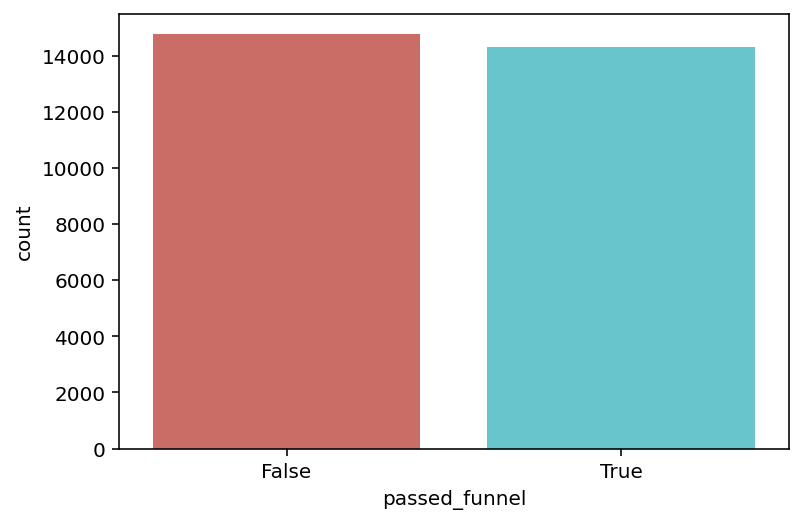

In [23]:
sns.countplot(x='passed_funnel',data=train, palette='hls')
plt.show()

In [42]:
from numpy import median
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [35]:
features = ['paid social',
            'paid search',
            'organic search',
            'organic social',
            'referral',
            'podcast',
            'email',
            'influencer',
            'other',
            'radio',
            'LAT',
            'LNG',
            'leadscore']

X = train[features]
y = train.passed_funnel
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
X.head()

,paid social,paid search,organic search,organic social,referral,podcast,email,influencer,other,radio,LAT,LNG,leadscore
0,0,0,0,1,0,0,0,0,0,0,45.117609,-93.338118,1.0
1,0,1,0,0,0,0,0,0,0,0,34.641313,-99.315940,1.0
2,1,0,0,0,0,0,0,0,0,0,NaN,NaN,1.0
3,1,0,0,0,0,0,0,0,0,0,40.847150,-73.898680,1.0
4,0,0,1,0,0,0,0,0,0,0,NaN,NaN,1.0


In [37]:
# fit model to training data
model = XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [np.round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

f1 = f1_score(y_test, predictions)
print("F1 Score: %.2f%%" % (f1 * 100.0))

# evaluate model
scores = cross_val_score(model, X, y, scoring='f1')
print('Median F1 Score: %.2f (%.2f)' % (median(scores), std(scores)))

Accuracy: 78.95%
F1 Score: 78.53%
Median F1 Score: 0.78 (0.00)


In [43]:
print(confusion_matrix(y_test, y_pred))

[[2943  691]
 [ 840 2800]]


In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.78      0.81      0.79      3634
        True       0.80      0.77      0.79      3640

    accuracy                           0.79      7274
   macro avg       0.79      0.79      0.79      7274
weighted avg       0.79      0.79      0.79      7274



# Prediction

In [45]:
test = pd.read_csv('testing_data.csv')

In [46]:
print('Shape: {0}'.format(test.shape))

Shape: (11791, 43)


In [47]:
test.head()

,customer_id,city,shipping_state,shipping_zipcode,first_activity_at,attribution_channel,vendor,leadscore,q_age,q_apply,q_braces,q_budget,q_changes,q_clear_aligners,q_conditions,q_conditions1,q_conditions2,q_conditions3,q_dental_concerns,q_describe_teeth,q_finance_options,q_fsa_hsa,q_fsa_hsa_monthly,q_goals,q_happy,q_how_hear,q_hesitations,q_how_urgent,q_invisible_aligners,q_last_ortho,q_long,q_monthly,q_options_considering,q_ortho_checkup,q_referral,q_severity,q_teeth_spacing,q_urgency,q_whitening,q_why_interested,q_years_considering,q_zip,survey_started_at
0,341893,Boston,MA,02121,2021-01-25 19:14:30.598,direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,355713,NaN,NaN,NaN,2021-01-20 20:30:20.158,paid social,facebook/instagram,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,395442,NaN,NaN,NaN,2021-06-14 18:51:35.696,paid social,facebook/instagram,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,394031,San jose,CA,95128,2021-06-10 01:35:06.523,referral,friendbuy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16334,Jersey City,NJ,07302,2021-03-17 01:23:16.058,direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# data cleansing and feature engineering

# test.leadscore = test.leadscore.fillna(test.leadscore.mode())
test.leadscore = test.leadscore.fillna(1.0)

test.attribution_channel = test.attribution_channel.fillna(test.attribution_channel.mode())

test.attribution_channel = test.attribution_channel.replace({'youtube': 'paid social',
                                                             'direct': 'paid social',
                                                             'social': 'paid social',
                                                             'streaming audio' : 'podcast',
                                                             'direct mail' : 'email',
                                                             'display': 'other',
                                                             'field': 'other',
                                                             'unknown': 'other',
                                                             'sms': 'other',
                                                             'ampush': 'other',
                                                             'part': 'other',
                                                             'ott': 'other'})

test.attribution_channel.value_counts()

paid social       6724
paid search       2335
organic search    1051
affiliate          687
organic social     384
email              269
referral           200
podcast            109
other               24
radio                4
Name: attribution_channel, dtype: int64

In [49]:
test = pd.concat([test, pd.get_dummies(test.attribution_channel, drop_first = True)], axis = 1)

test['influencer'] = 0

In [50]:
test = pd.merge(test, zipcodes, left_on = 'shipping_zipcode', right_on = 'ZIP', how = 'left')

In [51]:
test[features].head()

,paid social,paid search,organic search,organic social,referral,podcast,email,influencer,other,radio,LAT,LNG,leadscore
0,1,0,0,0,0,0,0,0,0,0,42.306267,-71.085897,1.0
1,1,0,0,0,0,0,0,0,0,0,NaN,NaN,2.0
2,1,0,0,0,0,0,0,0,0,0,NaN,NaN,1.0
3,0,0,0,0,1,0,0,0,0,0,37.315977,-121.936319,1.0
4,1,0,0,0,0,0,0,0,0,0,40.719389,-74.046469,1.0


In [52]:
customer_id = test.customer_id
test = test[features]

In [179]:
y_pred = model.predict(test)

In [181]:
predictions = pd.DataFrame({'customer_id': customer_id, 'prediction': y_pred})

In [182]:
predictions.prediction = predictions.prediction.replace({True: 1, False: 0})
predictions.head()

,customer_id,prediction
0,341893,1
1,355713,0
2,395442,0
3,394031,1
4,16334,1


In [183]:
predictions.to_csv(r'/Users/patchong/Google Drive/Work/Prep/Challenges/Candid/predictions.csv')

As a side note, considering the number of NaN's in the dataset, it might be advantageous to review the survey and study why only a small proportion of users are completing it. Is it too long, are the questions too complicated, or does the interface not encourage people to answer? Would it be best to replace free-form fields with pre-determined answers?

In terms of the actual data, zip code data could be used to look up demographic variables that aren't available at the individual level.  For example, http://www.city-data.com/ shares income distribution, age ranges, etc.

Ideally, the model is expanded so we can leverage prescriptive marketing tactics in real-time that will increase customer acquisition. At the moment, the model's sophistication is predictive (i.e. it tells us what will happen) and lagging in velocity (i.e. long terms between data and actions). Eventually, we want the model to be prescriptive (i.e. what should we do?) and provide real time options (i.e. the model's outputs directly influence actions in real time). E.g. large group of people completing survey in San Diego incdicates we should study whether we should open a studio in San Diego.